<a href="https://colab.research.google.com/github/lorransr/CAT/blob/master/Acidentes_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama dos acidentes de Trabalho no Brasil

O observatório geral da saude e segurança  do trabalho estima que do periodo de 2017 até maio de 2019, são registrados 1 acidente a cada 54 segundos no país. Desse valor, estima-se também que 1 morte aconteça a cada 4 horas. Entender onde, com quem, quando e como ocorrem os acidentes de trabalho são os primeiros passos para nortearmos políticas públicas de prevenção de acidentes.

Com isso em mente minha proposta é realizar uma analise, a partir das bases de dados disponibilizadas, através do portal da transparência, pela previdência social a respeito dos Acidentes do Trabalho ocorridos no pais.

A princípio foram adquiridas 8 bases de dados, com diferentes recortes a respeito do tema. Elas são:
1. Acidentes de Trabalho por UF
2. Acidentes de Trabalho por mês
3. Acidentes de Trabalho por faixa-etaria e sexo
4. Acidentes de Trabalho por parte do corpo atingida
5. Acidentes de Trabalho por CNAE (95)
6. Acidentes de Trabalho por CNAE (2.0)
7. Acidentes de Trabalho por CID
8. Acidentes de Trabalho por CBO

Todas as bases de dados estão segmentadas por ano. Todas contêm algum indicativo da situação de haver ou não CAT registrada. Igualmente, todas possuem um campo com a tipificação do acidente, seja ele típico, de trajeto ou uma doença de trabalho.

### Mas Afinal, o que é a CAT?

A comunicação de acidente de trabalho (CAT) é um documento emitido para reconhecer tanto um **acidente de trabalho** ou **de trajeto** bem como uma **doença ocupacional**.
Aqui vale a definição desses termos:

* Acidente de trabalho ou de trajeto:é o acidente ocorrido no exercício da atividade profissional a serviço da empresa ou no deslocamento residência -> trabalho -> residência. 

*  Doença ocupacional: é aquela produzida ou desencadeada pelo exercício do trabalho peculiar a determinada atividade e constante da respectiva relação elaborada pelo Ministério do Trabalho e da Previdência Social.

A CAT é um documento obrigatório e possui um prazo de emissão curto. Mesmo que não haja afastamento, a CAT deve ser emitida até o primeiro dia útil seguinte ao da ocorrência. Sob o risco de multa. Por conta desta característica a base de dados do INSS é extramemente útil e pouco defasada da realidade brasileira, portanto um bom instrumento para análise.

explicar melhor os seguintes termos:
* CNAE 
* CID
* CBO

## Acidentes de Trabalho por UF

O primeiro dataset a ser estudado será o que diz respeito aos acidentes de trabalho por unidade federal. Com essa base de dados pretendo responder a pergunta: "Onde ocorrem os acidentes de trabalho?". Também sera mostrado a evolução ao longo do tempo para as principais regiões.

In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [0]:
#importando os dados para o Colab
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-uf.csv"

In [0]:
#Salvando o dataframe
df_uf = pd.read_csv(url, sep=",", encoding = "latin-1")

In [5]:
#renomeando as colunas
df_uf.columns = ['ano','estado','motivo/situação','qtd_acidentes']
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes
0,1988,Rondônia,Típico-Com Cat,592.0
1,1988,Acre,Típico-Com Cat,115.0
2,1988,Amazonas,Típico-Com Cat,5173.0
3,1988,Pará,Típico-Com Cat,12172.0
4,1988,Maranhão,Típico-Com Cat,5916.0


In [6]:
#Contando a quantidade de valores nulos
df_uf.isna().sum()

ano                0
estado             0
motivo/situação    0
qtd_acidentes      1
dtype: int64

Uma vez que existe apenas uma linha, em 2893 registros, contendo valores nulos, ela será descartada

In [0]:
#excluindo valores nulos
df_uf.dropna(inplace=True) 

Para poder ter uma ideia da distribuição dos acidentes ao redor do pais é preciso primeiro vincular os estados na base de dados a uma latitude e longitude. A partir desse repositório no GitHub, foi possivel encontrar uma base consistente com algumas informações adicionais a respeito dos estados:https://github.com/kelvins/Municipios-Brasileiros/

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/brasil.csv"
#importando dataframe com lat e lon
dim_uf = pd.read_csv(url, sep=",")

In [9]:
dim_uf.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
0,520005,Abadia de Goiás,-16.75730,-49.4412,52,Goiás,GO,Centro-Oeste,0
1,310010,Abadia dos Dourados,-18.48310,-47.3916,31,Minas Gerais,MG,Sudeste,0
2,520010,Abadiânia,-16.19700,-48.7057,52,Goiás,GO,Centro-Oeste,0
3,310020,Abaeté,-19.15510,-45.4444,31,Minas Gerais,MG,Sudeste,0
4,150010,Abaetetuba,-1.72183,-48.8788,15,Pará,PA,Norte,0


In [10]:
#selecionando as colunas que firão no df
selected_columns=['latitude', 'longitude', 'cod_estado', 'estado',
       'uf', 'regiao', 'capital']
dim_uf = dim_uf[selected_columns]
#selecionando apenas as capitais
dim_uf = dim_uf[dim_uf["capital"]==1]
#removendo duplicadas
dim_uf.drop_duplicates(subset = "cod_estado",inplace=True)
dim_uf.drop("capital",axis=1,inplace=True)
dim_uf.head()

,latitude,longitude,cod_estado,estado,uf,regiao
294,-10.90910,-37.0677,28,Sergipe,SE,Nordeste
580,-1.45540,-48.4898,15,Pará,PA,Norte
592,-19.91020,-43.9266,31,Minas Gerais,MG,Sudeste
642,2.82384,-60.6753,14,Roraima,RR,Norte
755,-15.77950,-47.9297,53,Distrito Federal,DF,Centro-Oeste


In [11]:
#Juntando os dataframes
df_uf = pd.merge(df_uf,dim_uf, how ="inner", on="estado")
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
0,1988,Rondônia,Típico-Com Cat,592.0,-8.76077,-63.8999,11,RO,Norte
1,1988,Rondônia,Trajeto-Com Cat,78.0,-8.76077,-63.8999,11,RO,Norte
2,1988,Rondônia,Doença do Trabalho-Com Cat,9.0,-8.76077,-63.8999,11,RO,Norte
3,1989,Rondônia,Típico-Com Cat,558.0,-8.76077,-63.8999,11,RO,Norte
4,1989,Rondônia,Trajeto-Com Cat,52.0,-8.76077,-63.8999,11,RO,Norte


Foi necessário pegar apenas a localização das capitais pois dessa forma o mapa teria latitudes e longitudes que fariam mais sentido geograficamente. Do contrário os acidentes do RJ, poderiam estar vinculados a uma latitude e longitude na fronteira do estado, o que dificultaria a visualização.

In [12]:
#lista dos tipos de dados
df_uf.dtypes

ano                 object
estado              object
motivo/situação     object
qtd_acidentes      float64
latitude           float64
longitude          float64
cod_estado           int64
uf                  object
regiao              object
dtype: object

o campo ano deve ser alterado para representar um número inteiro

In [0]:
df_uf.ano = df_uf.ano.astype('int64')

Com a base de dados tratada agora é possivel tirar alguns insights dos dados adquiridos

In [14]:
df_uf.describe()

,ano,qtd_acidentes,latitude,longitude,cod_estado
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,2004.155202,5699.356723,-13.057547,-46.855375,29.812306
std,8.306485,21516.599192,8.788195,8.878290,12.667073
min,1988.000000,0.000000,-30.031800,-67.824300,11.000000
25%,1997.000000,97.000000,-20.315500,-51.206500,21.000000
50%,2006.000000,633.000000,-10.909100,-47.929700,28.000000
75%,2011.000000,3013.000000,-5.793570,-38.542300,41.000000
max,2016.000000,419981.000000,2.823840,-34.864100,53.000000


A princípio é possivel observar alguns pontos interessantes:
* Existe em algum lugar dos dados linha(s) com zero acidentes
* O maior númedo de acidentes registrado foi 419981 - o que levanta a questão a respeito do quando e onde isso ocorreu.
* Esse número gigantesco de acidentes se trata de um outlier uma vez que a grande maioria dos valores está entre 0 a 3000 acidentes.
* Nossa dataset abrange desde 1988 até 2016


### Zero Acidentes

Onde será que tivemos zero acidentes?

In [15]:
#Criando a tabela de zero acidentes
zero_acidentes = df_uf[df_uf['qtd_acidentes']==0]
zero_acidentes.sort_values(["regiao",
                            "estado",
                            "ano"]).drop(labels=["latitude",
                                                 "longitude",
                                                 "cod_estado",
                                                 "uf"],axis=1)

,ano,estado,motivo/situação,qtd_acidentes,regiao
2347,1993,Mato Grosso,Trajeto-Com Cat,0.0,Centro-Oeste
1075,1989,Alagoas,Doença do Trabalho-Com Cat,0.0,Nordeste
1078,1990,Alagoas,Doença do Trabalho-Com Cat,0.0,Nordeste
434,1990,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
437,1991,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
446,1994,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
449,1995,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
527,1988,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste
539,1992,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste
548,1995,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste


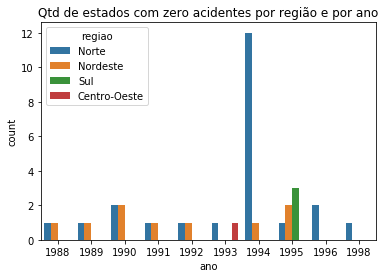

In [16]:
p = sns.countplot(x="ano",hue="regiao",data=zero_acidentes)
p.set_title("Qtd de estados com zero acidentes por região e por ano");

Os estados do norte apresentam a maior prevalência de anos sem acidente de qualquer tipo. Porém nenhum estado ficou 1 ano sem acidente desde 1998, como mostra o grafico acima. Fica evidenciado também que o sudeste não teve  nenhum ano sem acidentes.

No entanto na maioria dos anos em que não ocorreram acidentes de trabalho, a não ocorrência diz respeito ao motivo de doença de trabalho. Os anos em que tivemos zero acidentes de qualquer tipo são mostrados na tabela abaixo:

In [17]:
zero_acidentes.groupby(['regiao','ano'])[["motivo/situação"]].nunique()

motivo/situação
regiao       ano                  
Centro-Oeste 1993                1
Nordeste     1988                1
             1989                1
             1990                1
             1991                1
             1992                1
             1994                1
             1995                1
Norte        1988                1
             1989                1
             1990                1
             1991                1
             1992                1
             1993                1
             1994                3
             1995                1
             1996                1
             1998                1
Sul          1995                3

Infelizmente, não tivemos nenhum ano com nenhum tipo de acidente, em região nenhuma do país(se tivessemos encontrariamos alguma linha da tabela indicando as 4 categorias da coluna "motivo/situação").

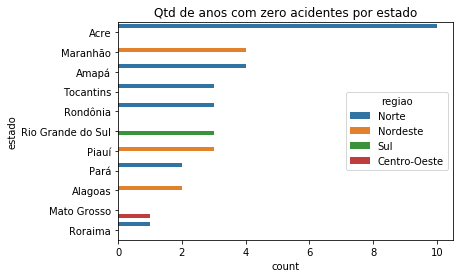

In [18]:
p = sns.countplot(y="estado",
                  data = zero_acidentes,
                  hue = "regiao",
              order = zero_acidentes['estado'].value_counts().index)
p.set_title("Qtd de anos com zero acidentes por estado");

O Acre foi, de longe, o estado que teve a maior quantidade de anos sem registrar acidentes. 

---

(cruzar essa informação com quantidade de postos de trabalho, população e postos de trabalho irregular )

### O maior número de acidentes registrado

Onde será que ele ocorreu?

In [19]:
#selecionando a linha com o maior número de acidentes registrado
df_uf[df_uf['qtd_acidentes']==419981]

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
1749,1988,São Paulo,Típico-Com Cat,419981.0,-23.5329,-46.6395,35,SP,Sudeste


1988 foi um ano tenso para São Paulo, que chegou a registrar um número tão expressivo de acidentes. O que traz o questionamento a respeito de como é a série histórica da maior metrópole brasileira. 

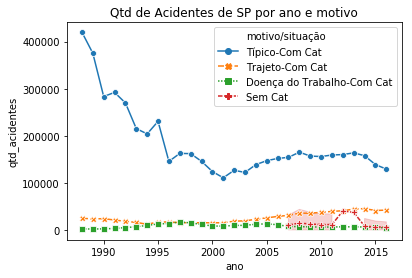

In [20]:
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=df_uf[df_uf["estado"]=="São Paulo"])
p.set_title("Qtd de Acidentes de SP por ano e motivo");

É possivel observar uma tendência de queda na quantidade de acidentes Típicos-com Cat(que são maioria) até os anos 2000. O que levanta uma outra questão. Como se comporta a queda de São Paulo com relação a média regional?

In [0]:
#fazendo a média da região
mean_regiao = df_uf[df_uf["estado"]!="São Paulo"].groupby(by = ["regiao","motivo/situação","ano"])[["qtd_acidentes"]].mean()
mean_regiao.reset_index(inplace = True)


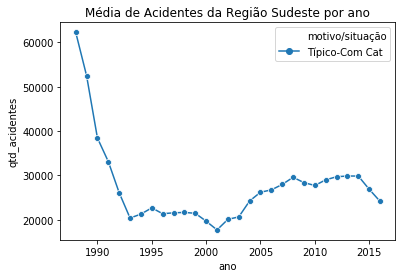

In [22]:

#plotando os dados
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=mean_regiao[(mean_regiao["regiao"]=="Sudeste")&
                             (mean_regiao["motivo/situação"]=="Típico-Com Cat")])
p.set_title("Média de Acidentes da Região Sudeste por ano");

In [0]:
#Criar gráfico que sobreponha a média da região com os valores de sp

### Distribuição da quantidade de acidentes por região

Observando a série histórica de todas as regiões do país é necessário se fazer uma analise em função do Log da quantidade de acidentes. Isso decorre do fato que a quantidade de acidentes é muito discrepante de região para região, como pode ser observado no gráfico abaixo

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


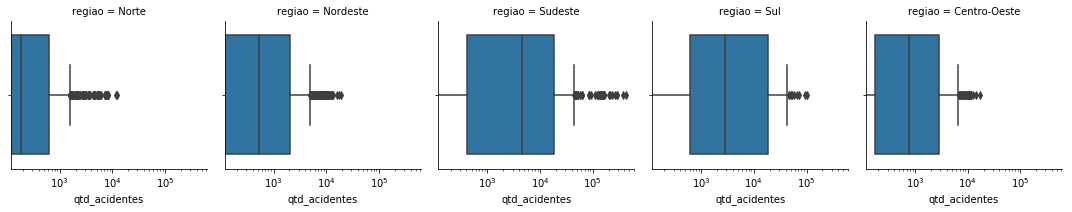

In [24]:
g = sns.FacetGrid(df_uf, col="regiao") 
g.map(sns.boxplot, "qtd_acidentes")
plt.xscale("log");

A região sudeste apresenta a distribuição mais concentrada nos valores entre $10^3$ e $10^4$, assim como a região sul. O que não é verdade para as outras regiões do pais que possuem os valores mais próximos da ordem de $10^2$ e $10^3$


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x2160 with 0 Axes>

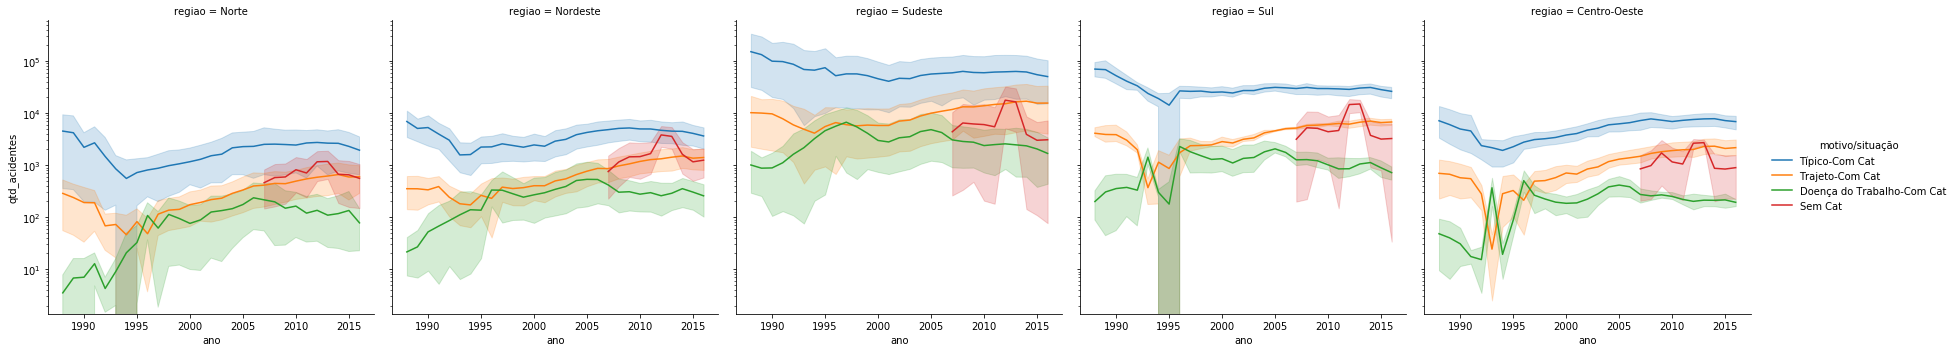

In [25]:
plt.figure(figsize=(20, 30))
g = sns.FacetGrid(df_uf,
                  col="regiao",
                  hue="motivo/situação",
                  size=5)
g.map(sns.lineplot,'ano',"qtd_acidentes").add_legend()
plt.yscale("log");

Em termos de média, a região sudeste foi a que apresentou a maior queda na quatidade de acidentes ao longo dos anos. 

### Top 10 estados com mais acidentes

In [26]:
agrupado = df_uf.groupby(by=['estado',"regiao","ano"])[["qtd_acidentes"]].sum().reset_index()

anos = agrupado.ano.unique()
agrupado.head()

,estado,regiao,ano,qtd_acidentes
0,Acre,Norte,1988,147.0
1,Acre,Norte,1989,162.0
2,Acre,Norte,1990,98.0
3,Acre,Norte,1991,117.0
4,Acre,Norte,1992,70.0


In [27]:
#media dos anos
agrupado_media = agrupado.groupby(by=["estado","regiao"])[["qtd_acidentes"]].mean()
agrupado_media.sort_values(by="qtd_acidentes",ascending=False,inplace=True)
agrupado_media=agrupado_media.reset_index()
agrupado_media.head(10)

,estado,regiao,qtd_acidentes
0,São Paulo,Sudeste,233079.482759
1,Minas Gerais,Sudeste,61328.068966
2,Rio Grande do Sul,Sul,49233.793103
3,Paraná,Sul,40790.620690
4,Rio de Janeiro,Sudeste,38621.551724
5,Santa Catarina,Sul,35255.586207
6,Bahia,Nordeste,15054.413793
7,Pernambuco,Nordeste,12210.655172
8,Goiás,Centro-Oeste,11632.172414
9,Espírito Santo,Sudeste,10061.896552


In [28]:
#numero de estados por região
agrupado.groupby(by=["regiao"])[["estado"]].nunique()

,estado
regiao,
Centro-Oeste,4
Nordeste,9
Norte,7
Sudeste,4
Sul,3


In [29]:
agrupado_media.describe()

,qtd_acidentes
count,27.000000
mean,21075.048115
std,45509.835274
min,359.500000
25%,2641.844828
50%,6235.172414
75%,13632.534483
max,233079.482759


Mais uma vez São Paulo se mostra como grande outlier da massa de dados. Na verdade, com relação as médias todos os estados do sudeste figuram na lista. Porém a comparação é injusta visto que o Brasil é um pais de dimensões continentais e a região sudeste é a mais populosa. Para avaliar melhor a situação do pais deve ser observado os estados com as maiores médias de acidente e em seguida observar o comportamento deles ao longo dos anos

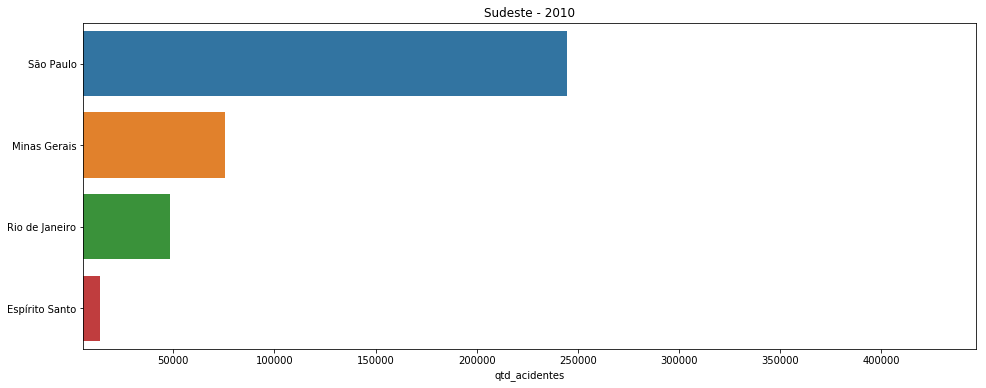

In [136]:
#@title Estados com mais acidentes por região { run: "auto" }
ano = 2010 #@param {type:"slider", min:1988, max:2016, step:1}
regiao = "Sudeste" #@param ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]

#agrupando o df por regiao
agrupado_regiao = agrupado[agrupado["regiao"]==regiao]

#criando o df para ser plotado
data = agrupado[agrupado["regiao"]==regiao]
data = data[data["ano"]==ano]
data.sort_values("qtd_acidentes",inplace=True,ascending=False)

#plotando
plt.figure(figsize =(16,6))
p = sns.barplot(y=list(data.estado.unique()),
                  x="qtd_acidentes",
                  data=data);
p.set_xlim(min(agrupado_regiao.qtd_acidentes)
           ,max(agrupado_regiao.qtd_acidentes))
p.set_title(regiao + " - "+str(ano));


### O mapa dos acidentes de trabalho

Agora com uma base de dados com as informações de latitude e longitude, meu objetivo é tentar retirar algumas informações com base na leitura de alguns mapas. Para isso usarei a biblioteca do Python Folium

In [0]:
import folium

In [144]:
#@title  { run: "auto" }
ano = 2016 #@param {type:"slider", min:1988, max:2016, step:1}
df_uf_map = df_uf[df_uf["ano"]==ano]
df_uf_map = df_uf_map.groupby(['estado',
                                 'latitude',
                                 'longitude'],
                                as_index=False)[['qtd_acidentes']].sum()
df_uf_map.qtd_acidentes = df_uf_map.qtd_acidentes.astype("int64")




ac_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)
for i in range(0,len(df_uf_map)):
  folium.CircleMarker(
      location =[df_uf_map.iloc[i]['latitude'],
                 df_uf_map.iloc[i]['longitude']],
      popup = df_uf_map.iloc[i]['estado']+' ; '+df_uf_map.iloc[i]['qtd_acidentes'].astype('str'),
      radius=int(df_uf_map.iloc[i]['qtd_acidentes']/5000),
      fill_color="crimson"
  ).add_to(ac_map)


ac_map

O mapa nos da um melhor compreendimento do que vem acontecendo ao longo dos anos com relação aos acidentes de trabalho

In [137]:
df_uf_map.head()

,estado,latitude,longitude,qtd_acidentes
0,Acre,-9.974990,-67.8243,958
1,Alagoas,-9.665990,-35.7350,4425
2,Amapá,0.034934,-51.0694,664
3,Amazonas,-3.118660,-60.0212,7073
4,Bahia,-12.971800,-38.5011,16712


In [145]:
from folium.plugins import HeatMap
heat_data =df_uf_map.drop(["estado","qtd_acidentes"],axis=1)
HeatMap(heat_data).add_to(ac_map)
ac_map

RecursionError: ignored

## Acidentes de Trabalho por Sexo e Faixa Etária